(300, 800, 4)


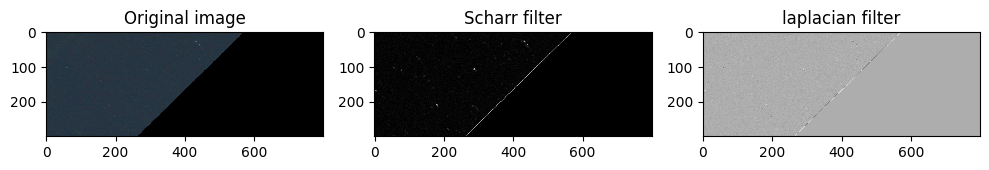

(300, 800, 4)


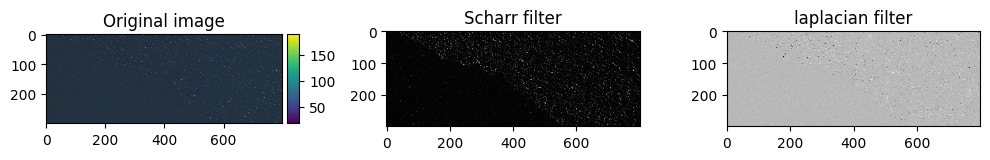

(300, 800, 4)


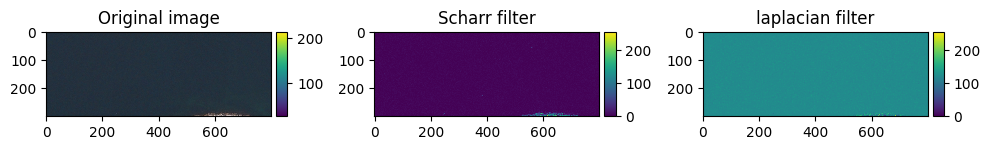

(300, 800, 4)


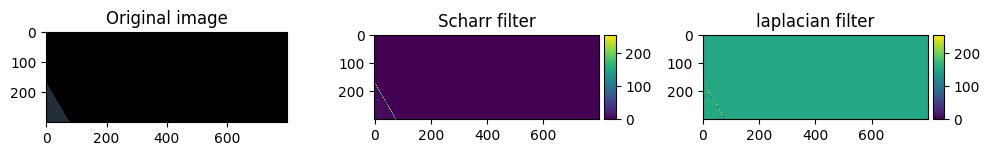

(300, 800, 4)


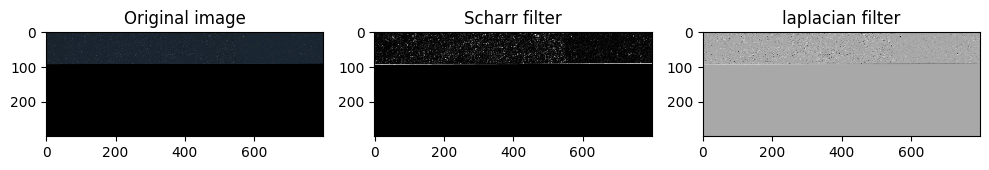

(300, 800, 4)


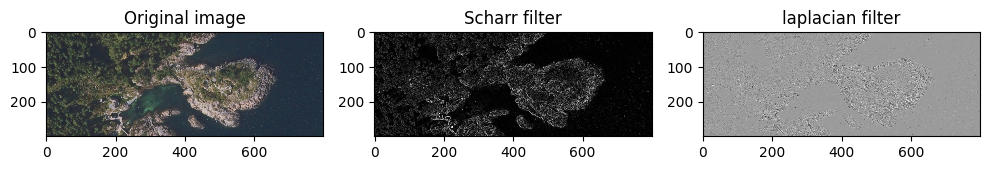

(300, 800, 4)


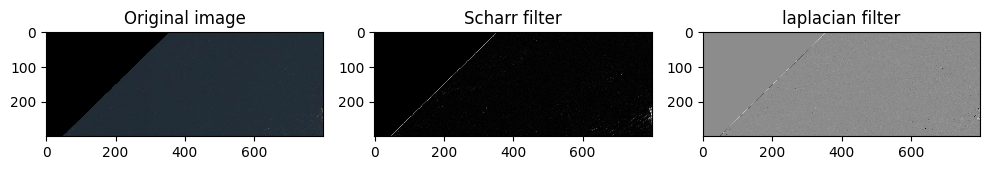

(300, 800, 4)


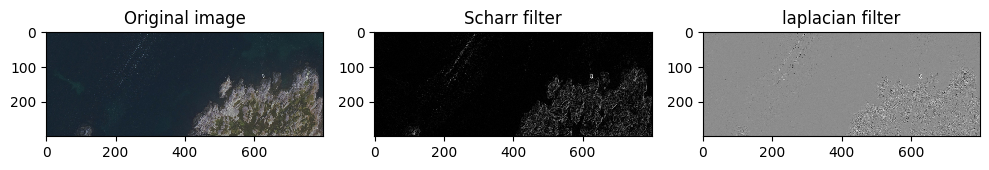

(300, 800, 4)


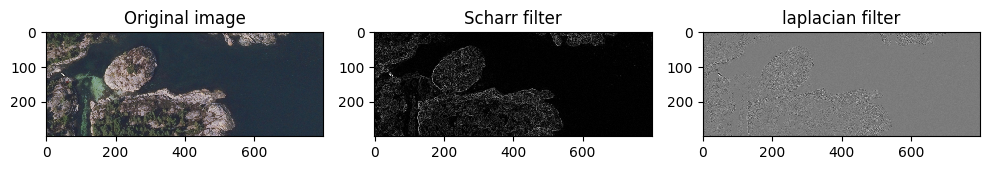

(300, 800, 4)


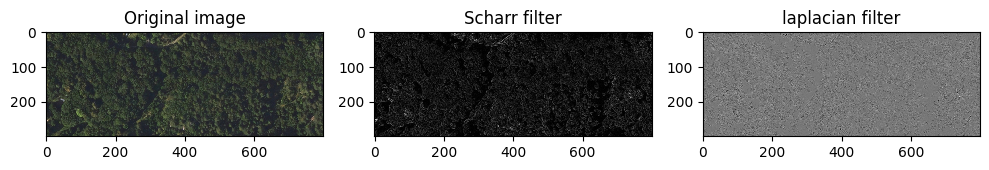

(300, 800, 4)


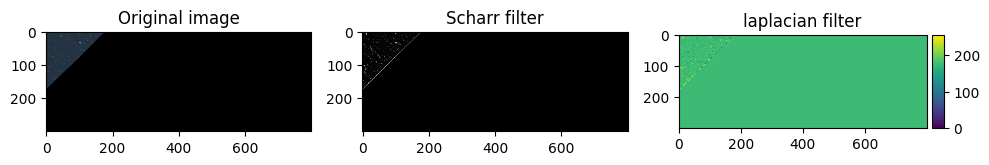

(300, 800, 4)


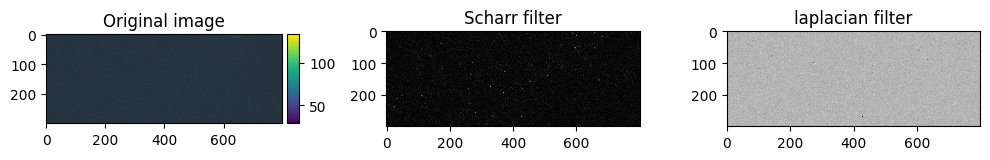

(300, 800, 4)


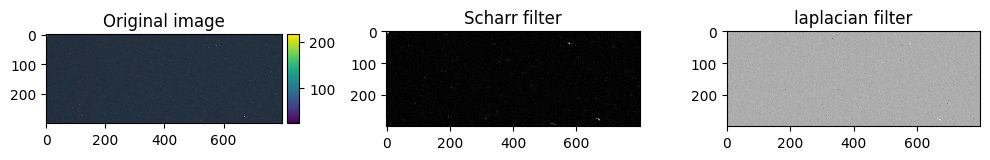

(300, 800, 4)


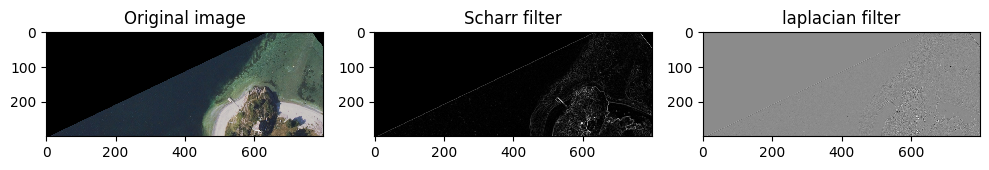

(300, 800, 4)


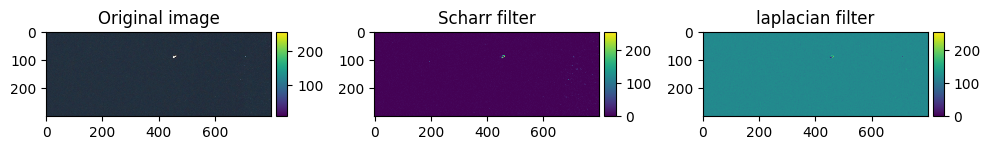

(300, 800, 4)


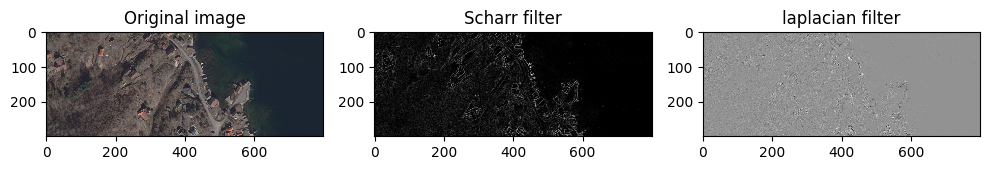

(300, 800, 4)


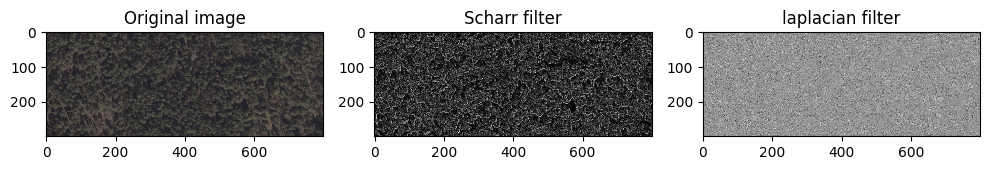

(300, 800, 4)


KeyboardInterrupt: 

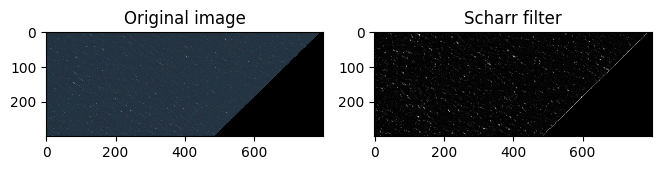

In [5]:
from skimage import exposure, filters
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
import os
import cv2 as cv
import numpy as np

def histogram_equalization(image):
    # Apply histogram equalization
    equalized_image = exposure.equalize_hist(image)

    return equalized_image

images_path = "../data/test_2/resized_800 – Kopi/"
images = [f for f in os.listdir(images_path) if f.endswith(".png")]
for image in images:
    img = imread(os.path.join(images_path, image))
    
    equalized_image = histogram_equalization(img)
    gaussian_image = filters.gaussian(img, sigma=1.0)
    #laplacian
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # Apply the Laplacian filter
    laplacian_result = cv.Laplacian(gray_img, cv.CV_64F)
    normalized_laplacian = cv.normalize(laplacian_result, None, 0, 255, cv.NORM_MINMAX)
    normalized_laplacian = np.uint8(normalized_laplacian)
    laplacian_img = np.dstack([img, normalized_laplacian])
    #Scharr
    # Apply the Scharr operator
    scharr_x = cv.Scharr(gray_img, cv.CV_64F, 1, 0)
    scharr_y = cv.Scharr(gray_img, cv.CV_64F, 0, 1)
    scharr_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)
    normalized_scharr = cv.normalize(scharr_magnitude, None, 0, 255, cv.NORM_MINMAX)
    scharr_result = np.uint8(normalized_scharr)

    scharr_img = np.dstack([img, scharr_result])
    
    # Apply the Sobel operator
    sobel_x = cv.Sobel(gray_img, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(gray_img, cv.CV_64F, 0, 1, ksize=3)
    
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    
    normalized_sobel = cv.normalize(sobel_magnitude, None, 0, 255, cv.NORM_MINMAX)
    sobel_result = np.uint8(normalized_sobel)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original image')
    imshow(img)
    
    plt.subplot(1, 3, 2)
    plt.title('Scharr filter')
    imshow(scharr_result)

    print(scharr_img.shape)
    plt.subplot(1, 3, 3)
    plt.title('laplacian filter')
    imshow(normalized_laplacian)
    
    plt.show()

    


In [50]:
import numpy as np

# Your original array of shape (2, 2, 1)
original_array = np.random.rand(256, 256, 3)

# New array of size (1, 2)
new_array = np.random.rand(256, 256, 1)

# Concatenate along the second axis to achieve a new shape of (2, 2, 2)
result_array = np.concatenate((original_array, new_array), axis=-1)

# Print the shapes for verification
print("Original Array Shape:", original_array.shape)
print("New Array Shape:", new_array.shape)
print("Result Array Shape:", result_array.shape)


Original Array Shape: (256, 256, 3)
New Array Shape: (256, 256, 1)
Result Array Shape: (256, 256, 4)


In [49]:
original_array

array([[[0.40627393, 0.92720106, 0.45026486],
        [0.20680521, 0.6965329 , 0.07305   ],
        [0.39186354, 0.17560436, 0.87662841],
        ...,
        [0.32597179, 0.95608672, 0.95348855],
        [0.33049125, 0.45375583, 0.93857105],
        [0.91092641, 0.34020187, 0.79149998]],

       [[0.23230622, 0.8111434 , 0.2742547 ],
        [0.6655657 , 0.08119051, 0.79423411],
        [0.79889708, 0.57686944, 0.25487427],
        ...,
        [0.30719905, 0.47215709, 0.72506487],
        [0.85618617, 0.60096785, 0.07379819],
        [0.38405066, 0.80463263, 0.89539733]],

       [[0.77816346, 0.40560005, 0.14045017],
        [0.3733271 , 0.57136261, 0.55299396],
        [0.63801732, 0.26352145, 0.97585505],
        ...,
        [0.96822926, 0.07350562, 0.18200453],
        [0.32270823, 0.91839682, 0.91314545],
        [0.97230082, 0.73593086, 0.21335491]],

       ...,

       [[0.37966384, 0.84603562, 0.22721995],
        [0.73223439, 0.98028255, 0.39434953],
        [0.23785672, 0